# Loss Function of Logistic Regression

When we optimize, we need an objective function to minimize. In logistic regression, we don't use the Frobenius norm like
we do in least squares. Why? Most importantly, for numerical reasons (we like convex optimization problems). Second, we want to constrain our predictions to be distributions.

Frobenius norm

\begin{gather}
\phi(\textbf{W})=\Big\Vert \left(\exp(\textbf{WY})\text{diag}\left(\frac{1}{\textbf{e}^\top\exp(\textbf{WY})}\right)\right) - \textbf{C}_\text{obs} \Big\Vert^2_F
\end{gather}

Cross entropy

\begin{gather}
E(\textbf{C}_\text{obs}, \textbf{C})=-\frac{1}{n}\text{tr}\left(\textbf{C}_\text{obs}^\top\log \left(\exp(\textbf{WY})\text{diag}\left(\frac{1}{\textbf{e}^\top\exp(\textbf{WY})}\right)\right)\right)
\end{gather}

## Derivation of Multinomial Cross Entropy

Let's derive this formula for cross entropy. The basic idea is we want to compare two probability distributions. In our case, 
it's $\textbf{C}_\text{obs}$ and $\textbf{C}$. Let's say we have one observation and two classes to predict. $\textbf{c}_\text{obs}$ is a $2 \times 1$ column vector. $\textbf{w}$ is a $n_f \times 1$ vector and $\textbf{y}$ is a $n_f \times 1$ vector. Then our cross-entropy is

\begin{gather}
E(\textbf{c}_\text{obs}, \textbf{c})=-\textbf{c}_\text{obs}^\top\log(\textbf{c}(\textbf{y,w})) \\\\ 
= -\textbf{p}_\text{obs}\log(h(\textbf{w}^\top \textbf{y}))-(1-\textbf{p}_\text{obs})\log(1-h(\textbf{w}^\top \textbf{y}))
\end{gather}

We take the sum of the product of the true 1 and the log predicted 1, and the product of the true 0 and the log predicted 0.

When we have now $n > 1$, we want to sum over all those examples. So it'd be the above, but summed over each $n$. So $2n$
total terms to add up. $\textbf{C}_\text{obs}$ is a $2 \times n$ matrix. $\textbf{w}$ is still a $n_f \times 1$ vector (shared by all observations) and $\textbf{Y}$ is a $n_f \times n$ matrix.

\begin{gather}
E(\textbf{C}_\text{obs}, \textbf{C})=-\frac{1}{n}\text{tr}(\textbf{C}^\top_\text{obs}\log(\textbf{C})) \\
= -\frac{1}{n}\textbf{c}^\top_\text{obs}\log(h(\textbf{w}^\top\textbf{Y})) - \frac{1}{n}(1-\textbf{c}_\text{obs})^\top\log(1-h(\textbf{w}^\top\textbf{Y}))
\end{gather}

Now we want to build this up to handle more than 2 classes. We can further generalize this by allowing the $\textbf{W}$ matrix
to have more than 2 rows, so that $\textbf{C}$ is a $n_c \times n$ matrix, $\textbf{S}=\textbf{WY}$

\begin{gather}
E(\textbf{C}, \textbf{WY})=-\frac{1}{n}\text{tr}\left(\textbf{C}^\top\log \left(\exp(\textbf{WY})\text{diag}\left(\frac{1}{\textbf{e}^\top\exp(\textbf{WY})}\right)\right)\right) \\\\
= -\frac{1}{n} \sum^{n_c}_{i=1} \sum^{n}_{j=1}\textbf{C}_{ij}\log \left( \frac{\exp(\textbf{S}_{ij})}{\sum_{k=1}^{n_c}\exp \textbf{S}_{kj}} \right) \\\\
= -\frac{1}{n} \sum^{n_c}_{i=1} \sum^{n}_{j=1} \textbf{C}_{ij} \left( \log (\exp (\textbf{S}_{ij}) - \log \sum_{k=1}^{n_c}\exp \textbf{S}_{kj} \right) \\ \\
= -\frac{1}{n} \sum^{n_c}_{i=1} \sum^{n}_{j=1} \textbf{C}_{ij} \textbf{S}_{ij} + \frac{1}{n} \sum^{n_c}_{i=1} \sum^{n}_{j=1} \textbf{C}_{ij} \log \sum_{k=1}^{n_c}\exp \textbf{S}_{kj} \\ \\
= -\frac{1}{n} \textbf{e}_{n_c}^\top(\textbf{C} \odot \textbf{S})\textbf{e}_{n}+\frac{1}{n} \sum^{n}_{j=1} \log \left (\sum_{i=1}^{n_c}\exp \textbf{S}_{ij} \right) \sum^{n_c}_{i=1}\textbf{C}_{ij} \\\\
= -\frac{1}{n} \textbf{e}_{n_c}^\top(\textbf{C} \odot \textbf{S})\textbf{e}_{n}+\frac{1}{n} \sum^{n}_{j=1}\textbf{e}^\top_{n_c} \textbf{C}_{(:),j} \log(\textbf{e}^\top_{n_c}\exp \textbf{S}_{(:),j}) \\\\
= -\frac{1}{n} \textbf{e}_{n_c}^\top(\textbf{C} \odot \textbf{S})\textbf{e}_{n} + \frac{1}{n} \textbf{e}^\top_{n_c} \textbf{C} \left (\log(\textbf{e}^\top_{n_c}\exp \textbf{S}) \right)^\top \\\\
= -\frac{1}{n} \textbf{e}_{n_c}^\top(\textbf{C} \odot \textbf{S})\textbf{e}_{n} + \frac{1}{n} \log(\textbf{e}^\top_{n_c}\exp \textbf{S}) \textbf{e}_{n}
\end{gather}

Observe that since $\textbf{C}$ represents $n$ probability distributions, $\textbf{e}_{n_c}^\top\textbf{C}=\textbf{e}_n^\top$. Also for the inner product in the second to last step, remember for vectors in real space $x^\top y = y^\top x$. The above identity gives us an easier way to implement the softmax cross entropy objective function in code.

In [1194]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optim
import pathlib
import os

os.chdir("/c/Users/thsiao3/Documents/emory_class/MATH789/hw4/")

from utils import scipyOptMinWrapper

np.random.seed(1)

In [1195]:
def softmax(W, c=0):
    """c is how much to subtract from each column of W @ Y"""
    # This is the 2D version of softmax, with a transformation involved. 
    return np.exp(W - c) / (np.exp(-c) + np.exp(W - c))

In [1209]:
n_f = 2
n = 100

B_true = np.random.uniform(-1, 1, size=2)
Ytrain = np.random.uniform(-1, 1, (n_f, n))
Ctrain = softmax(B_true @ Ytrain)
Ctrain[Ctrain > .5] = 1; Ctrain[Ctrain <=.5] = 0

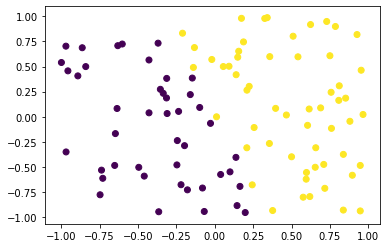

In [1210]:
plt.scatter(Ytrain[0], Ytrain[1], c=Ctrain)

In [1211]:
def objective_lstsq(W):
    S = W @ Ytrain
    A = S; A[A > 0] = 0
    S = softmax(S, A)
    return np.linalg.norm(S - Ctrain)

## Numerical considerations for softmax

Observe that for the scenario of 2 classes, we have the softmax function and the logistic sigmoid function to choose from. 

\begin{gather}
f(x)=\frac{e^x}{1+e^x} \\
f(x_1, x_2)=\frac{e^{x_1}}{e^{x_1}+e^{x_2}}
\end{gather}

Which to choose? Logistic sigmoid only pays attention to my linear combination output for class 1, while softmax considers both and constrains the distribution to sum to 1. We can actually rewrite the softmax with two classes to

\begin{gather}
f(x_1, x_2)=\frac{e^{x_1}}{e^{x_1}+e^{x_2}}=\frac{e^{{x_1-x_2}}}{1+e^{x_1-x_2}}
\end{gather}

Where $x=x_1-x_2$

Now let's talk about overflow and underflow. Since the softmax deals with exponentiation, it can quickly lead to overflow if the number $x$ is too big. So one thing we can do for a vector of size $1 \times n$ is to subtract a constant from each value. Why does this work? 

\begin{gather}
f(x_1-c, x_2-c)=\frac{e^{x_1-c}}{e^{x_1-c}+e^{x_2-c}}=\frac{e^{x_1}}{e^{x_1}+e^{x_2}}
\end{gather}

Therefore, we'd have one value with 0 (the max), and all the other values would be adjusted downwards by that max. This would most certainly prevent overflow, as our maximum value to exponentiate would be 0, but what about underflow? If my max is a very large number and I had an original value somehwere of 0, wouldn't the value now have to be exponentiated? If it would have lead to overflow, it most certainly will lead to underflow. Luckily, it turns out we don't need to subtract each one of our $n$ observations by the same amount. We just need each set of values within an observation to be adjusted by the same amount.

If we have $n$, then I can choose $c_i=\max(x_{i1}, x_{i2})=x_{i1}$ (assuming interchangeablility). Then the softmax applied to each of these observations would be $f(x_{i1},x_{i2})=f(x_{i1}-c_i,x_{i2}-c_i)=f(0,x_{i2}-x_{i1})$. If we do this for each vector of size two, we can prevent both underflow and overflow. The only way you'd get overflow and underflow is if there is a large difference between $x_{i1}$ and $x_{i2}$ for any $i$, which is much less likely than using one value to adjust for all $i$.

So in the case of $2$ classes, but where we still set our $\textbf{C}_\text{obs}$ output label vector to be size $1 \times n$ instead of a matrix $\textbf{C}_\text{obs}$ of size $2 \times n$ and the weights $\textbf{w}^\top$ to be size $1 \times n_f$ instead of size $2 \times n_f$
we treat it as if the softmax will be applied to the two values $0$ and $x_{i1}$ and $x_{i2}$. Then for the numerical adjustment, if our $\textbf{w}^\top \textbf{Y}$, a $1 \times n$ row vector, is greater than 0, we set it to zero. If it's less than or equal to 0, we leave it as is.

\begin{gather}
\textbf{w}^\top \textbf{Y}[\textbf{w}^\top \textbf{Y}>0]=0 \\
\textbf{w}^\top \textbf{Y}[\textbf{w}^\top \textbf{Y}\leq 0]=\textbf{w}^\top \textbf{Y}
\end{gather}

In [1212]:
def objective_CE(W):
    S = W @ Ytrain
    A = S; A[A > 0] = 0
    S = softmax(S, A)
    E = -1/n*np.inner(Ctrain, np.log(S)) - 1/n*np.inner(1 - Ctrain, np.log(1 - S))
    return E

In [1236]:
# Model Preds grid
xmin=-10; xmax=30
ymin=-5; ymax=20
x = np.arange(xmin, xmax, .5)
y = np.arange(ymin, ymax, .5)[::-1]
X, Y = np.meshgrid(x,y)
Z = np.stack((X, Y), axis=0)

In [1237]:
outputLSTSQ = np.apply_along_axis(objective_lstsq, axis=0, arr=Z)
outputCE = np.apply_along_axis(objective_CE, axis=0, arr=Z)

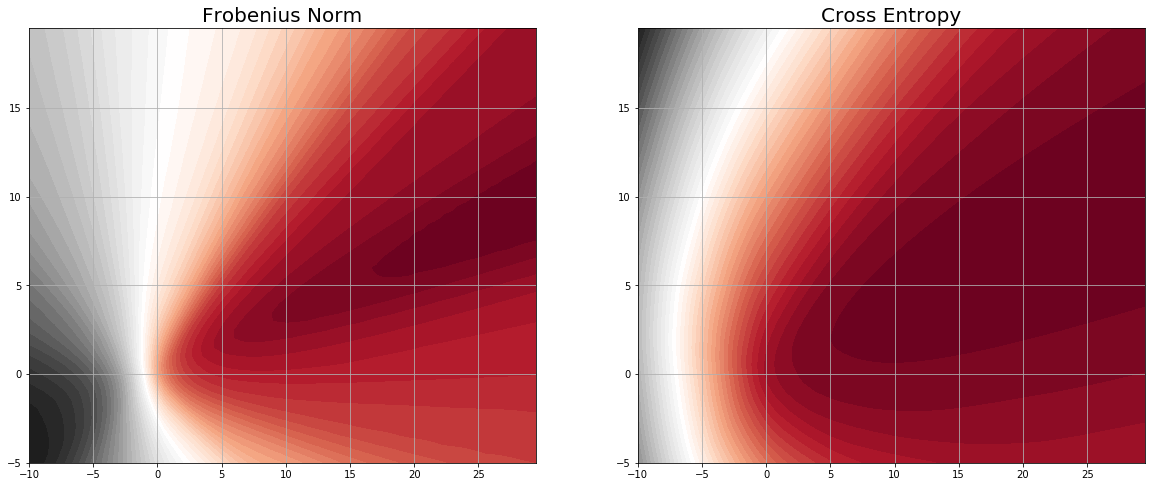

In [1238]:
fig, axs = plt.subplots(1, 2, sharex=False, sharey=False)
fig.set_figheight(8)
fig.set_figwidth(20)
axs[0].contourf(X, Y, outputLSTSQ, 50, cmap='RdGy')
axs[1].contourf(X, Y, outputCE, 50, cmap='RdGy')
axs[1].set_title('Cross Entropy', size=20)
axs[0].set_title('Frobenius Norm', size=20)
axs[0].grid()
axs[1].grid()

One is non-convex, one is convex. That's all the reason you need to go with Cross-Entropy. Choosing a bad starting point could
end badly if we optimized over the frobenius norm.

In [1239]:
X1=scipyOptMinWrapper(fun=objective_lstsq, x0=[-10,10])
X2=scipyOptMinWrapper(fun=objective_CE, x0=[10,10])

/home/thsiao3/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


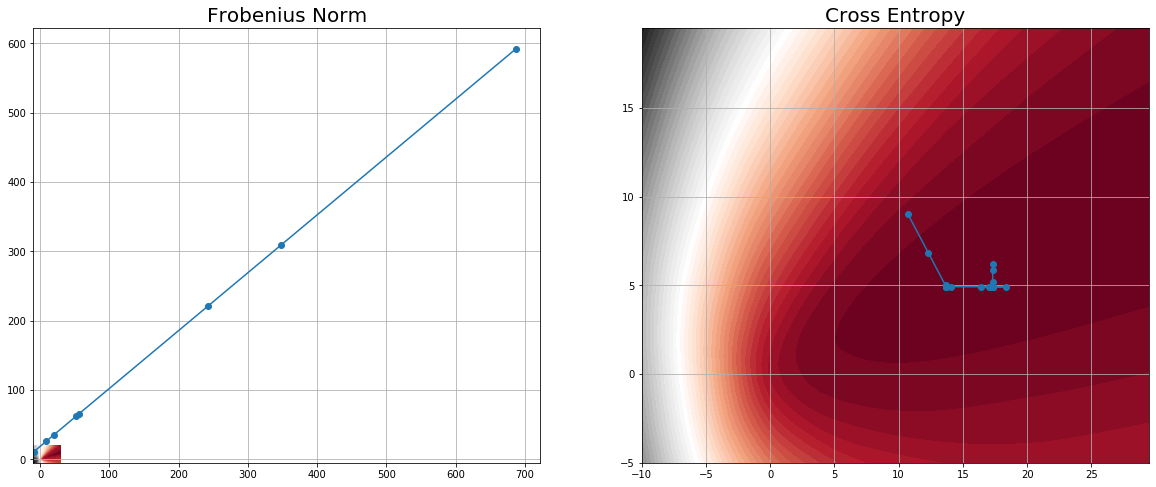

In [1240]:
axs[0].plot(X1['Xall'][0], X1['Xall'][1], marker='o')
axs[1].plot(X2['Xall'][0], X2['Xall'][1], marker='o')
fig

# Visualizing Prediction Results

In [1241]:
x1 = X1['solResult'].x
x2 = X2['solResult'].x

In [1242]:
C1 = x1 @ Ytrain
C1[C1>.5] = 1
C1[C1<=.5] = 0
C2 = x2 @ Ytrain
C2[C2>.5] = 1
C2[C2<=.5] = 0

In [1244]:
print("Frobenius accuracy: {}".format(np.mean(C1 == Ctrain)))
print("Cross entropy accuracy: {}".format(np.mean(C2 == Ctrain)))

Frobenius accuracy: 0.89
Cross entropy accuracy: 0.98


Text(0.5, 1.0, 'Cross Entropy')

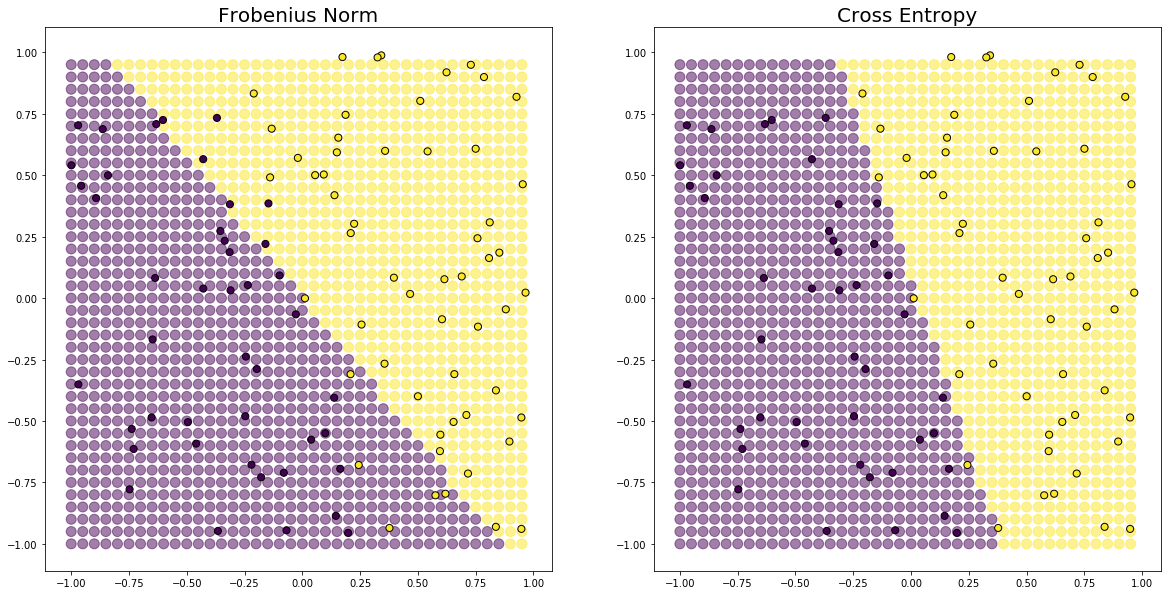

In [1269]:
fig, ax = plt.subplots(1,2)
fig.set_figheight(10)
fig.set_figwidth(20)
x = np.arange(-1,1,.05)
y = np.arange(-1,1,.05)
Grid = np.array([np.array([a, b]) for a in x for b in y]).T
C1 = x1 @ Grid; C1[C1>.5] = 1; C1[C1<=.5] = 0
C2 = x2 @ Grid; C2[C2>.5] = 1; C2[C2<=.5] = 0

ax[0].scatter(Grid[0], Grid[1], c=C1, s=100, alpha=0.5)
ax[0].scatter(Ytrain[0], Ytrain[1], c=Ctrain, edgecolors='black', s=50)
ax[0].set_title('Frobenius Norm', size=20)
ax[1].scatter(Grid[0], Grid[1], c=C2, s=100, alpha=0.5)
ax[1].scatter(Ytrain[0], Ytrain[1], c=Ctrain, edgecolors='black', s=50)
ax[1].set_title('Cross Entropy', size=20)

# Summary

1. Given data $\textbf{Y}, \textbf{C}$.Try linear. $\min_{\textbf{W}} \Vert \textbf{WY} - \textbf{C} \Vert_F$
2. But linear doesn't guarantee $\textbf{WY}$ is a probability distribution like $\textbf{C}$ for classification. So use softmax to constrain each observation's class outputs to sum to 1.
3. Try Frobenius norm $\min_\textbf{W} \Vert \text{softmax}(\textbf{WY})-\textbf{C} \Vert_F$
4. But Frobenius non-convex optimization. Instead use Cross entropy. Done $\min_{W} \textbf{E(C, WY})$